In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Fraud.csv')

In [3]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
dataset.shape

(6362620, 11)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Statistical Description and inferences

In [6]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<AxesSubplot:xlabel='type', ylabel='count'>

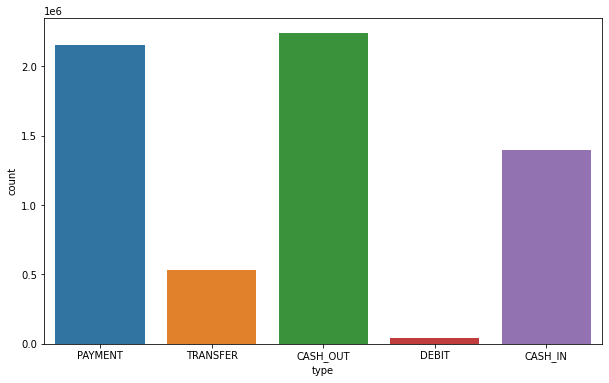

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='type', data=dataset)

Cash-out type is the highest in quantity in transfer types followed by payment and cash-in

In [8]:
dataset['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

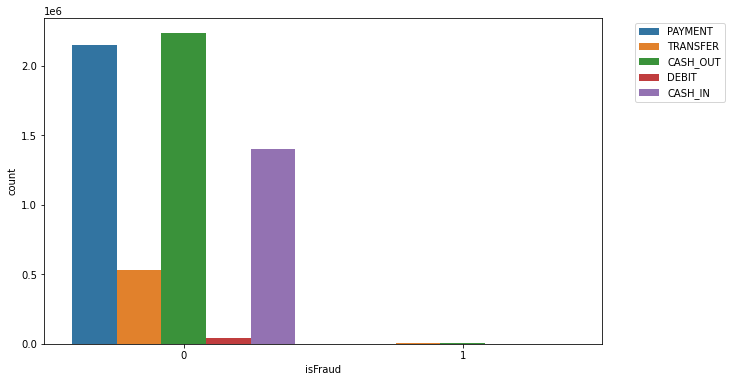

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='isFraud', hue='type', data=dataset)
plt.legend(bbox_to_anchor=(1.05,1))

It shows that there are more fraudulent transactions in quantity through Cash-Out type

In [10]:
dataset_trans_over_two_lakh = dataset[dataset['amount'] > 200000]

<AxesSubplot:xlabel='isFraud', ylabel='count'>

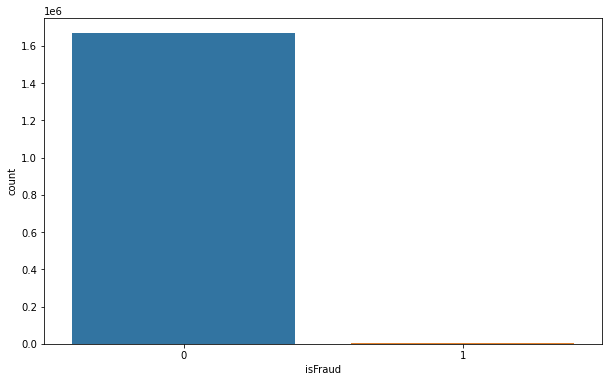

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='isFraud', data=dataset_trans_over_two_lakh)

Almost all transactions over $ 200,000.00 are fraudulents

In [12]:
dataset_new_bal_is_zero = dataset[dataset['newbalanceOrig']==0]
dataset_new_bal_not_zero = dataset[dataset['newbalanceOrig']!=0]

In [13]:
dataset_new_bal_is_zero['isFraud'].value_counts(), dataset_new_bal_not_zero['isFraud'].value_counts()

(0    3601513
 1       8053
 Name: isFraud, dtype: int64,
 0    2752894
 1        160
 Name: isFraud, dtype: int64)

That means there is more chance of having a fraudulent transaction when the new origin's balance is zero

<AxesSubplot:>

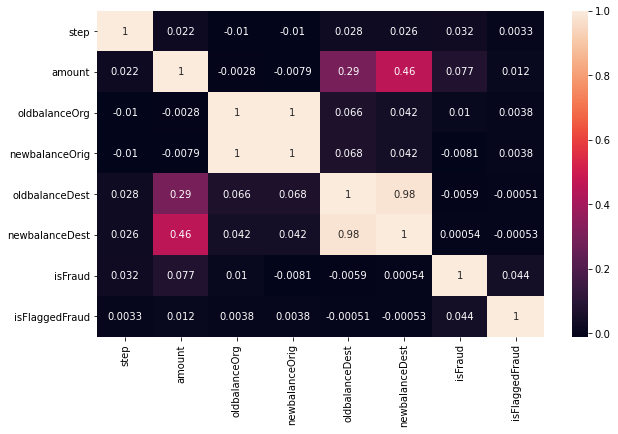

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),annot=True)

# Data Cleaning

In [15]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There is no missing value in the dataset

### Handling outliers

We are going to eliminate all the values outside the Interquartile Range, considering 25 percentile and 75 percentile

In [16]:
Q1 = np.percentile(dataset['amount'],25)
Q3 = np.percentile(dataset['amount'],75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [17]:
dataset = dataset[(dataset['amount']>lower_limit) & (dataset['amount']<upper_limit)]

In [18]:
dataset.shape

(6024542, 11)

### Handling multi-collinearity

We will do some feature engineering and according to the Variance Inflation Factor, we will eliminate some of the columns

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
dataset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [21]:
data = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
vif_data = pd.DataFrame()
vif_data['features'] = data
vif_data['VIF'] = [variance_inflation_factor(dataset[data].values,i) for i in range (len(data))]

In [22]:
vif_data

,features,VIF
0,step,1.562840
1,amount,2.244722
2,oldbalanceOrg,1606.453870
3,newbalanceOrig,1625.437648
4,oldbalanceDest,231.599150
5,newbalanceDest,234.878078
6,isFraud,1.006938
7,isFlaggedFraud,1.000461


In [23]:
dataset['balance_dest_diff'] = dataset['oldbalanceDest'] - dataset['newbalanceDest']

In [24]:
dataset = dataset.drop(['oldbalanceOrg', 'newbalanceOrig'], axis=1)

In [25]:
dataset.head()

,step,type,amount,nameOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_dest_diff
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0.0,0.0,0,0,0.0
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0.0,0.0,0,0,0.0
2,1,TRANSFER,181.00,C1305486145,C553264065,0.0,0.0,1,0,0.0
3,1,CASH_OUT,181.00,C840083671,C38997010,21182.0,0.0,1,0,21182.0
4,1,PAYMENT,11668.14,C2048537720,M1230701703,0.0,0.0,0,0,0.0


In [26]:
trans_type = pd.get_dummies(dataset['type'],drop_first=True)

In [27]:
dataset = pd.concat([dataset, trans_type],axis=1)

In [28]:
dataset.head()

,step,type,amount,nameOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_dest_diff,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0.0,0.0,0,0,0.0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0.0,0.0,0,0,0.0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,C553264065,0.0,0.0,1,0,0.0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,C38997010,21182.0,0.0,1,0,21182.0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,M1230701703,0.0,0.0,0,0,0.0,0,0,1,0


In [29]:
dataset = dataset.drop(['type', 'nameOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest'],axis=1)

In [30]:
dataset.head()

,step,amount,isFraud,isFlaggedFraud,balance_dest_diff,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,0,0,0.0,0,0,1,0
1,1,1864.28,0,0,0.0,0,0,1,0
2,1,181.00,1,0,0.0,0,0,0,1
3,1,181.00,1,0,21182.0,1,0,0,0
4,1,11668.14,0,0,0.0,0,0,1,0


In [31]:
data = ['step', 'amount', 'isFraud', 'isFlaggedFraud', 'balance_dest_diff', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']
vif_data = pd.DataFrame()
vif_data['features'] = data
vif_data['VIF'] = [variance_inflation_factor(dataset[data].values,i) for i in range (len(data))]

In [32]:
vif_data

,features,VIF
0,step,2.908717
1,amount,2.191841
2,isFraud,1.005521
3,isFlaggedFraud,1.000462
4,balance_dest_diff,1.334717
5,CASH_OUT,2.297163
6,DEBIT,1.015570
7,PAYMENT,1.735809
8,TRANSFER,1.258622


Now the VIF values are pretty much in limit

In [33]:
dataset.describe()

,step,amount,isFraud,isFlaggedFraud,balance_dest_diff,CASH_OUT,DEBIT,PAYMENT,TRANSFER
count,6.024542e+06,6.024542e+06,6.024542e+06,6.024542e+06,6.024542e+06,6.024542e+06,6.024542e+06,6.024542e+06,6.024542e+06
mean,2.433126e+02,1.115342e+05,7.235405e-04,3.319754e-07,-5.075638e+04,3.627245e-01,6.876871e-03,3.571218e-01,4.523863e-02
std,1.422881e+02,1.203983e+05,2.688898e-02,5.761731e-04,2.545998e+05,4.807863e-01,8.264128e-02,4.791512e-01,2.078271e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.790352e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.236854e+04,0.000000e+00,0.000000e+00,-1.188829e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.380000e+02,6.317582e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.340000e+02,1.829338e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,7.430000e+02,5.017184e+05,1.000000e+00,1.000000e+00,1.306083e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


<AxesSubplot:>

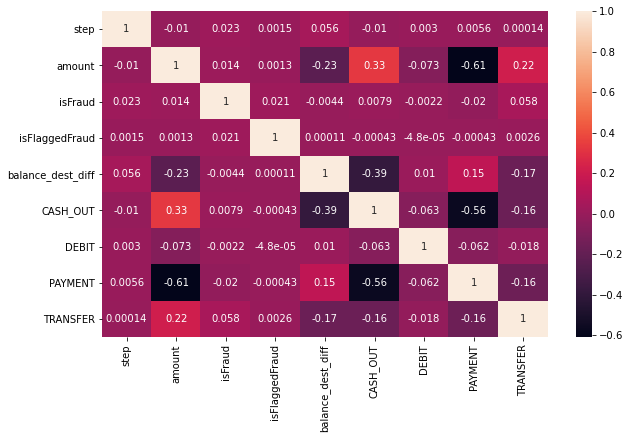

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), annot=True)

In [35]:
X = dataset.drop('isFraud',axis=1).values
y = dataset['isFraud'].values

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
X_train[:,[0,1,3]] = scaler.fit_transform(X_train[:,[0,1,3]])
X_test[:,[0,1,3]] = scaler.transform(X_test[:,[0,1,3]])                                                  

# Model building

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(n_estimators=30)

In [43]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
confusion_matrix(y_test, rfc.predict(X_test))

array([[1203969,      28],
       [    423,     489]])

In [47]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1203997
           1       0.95      0.54      0.68       912

    accuracy                           1.00   1204909
   macro avg       0.97      0.77      0.84   1204909
weighted avg       1.00      1.00      1.00   1204909



### Hyperparameter Tuning

In [50]:
# from sklearn.model_selection import RandomizedSearchCV

In [51]:
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10]

# ran_parameters = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                 'bootstrap':[True, False]}

In [53]:
# ran_cv = RandomizedSearchCV(estimator=rfc, param_distributions=ran_parameters, cv=5, n_jobs=-1, verbose=2)

In [55]:
# ran_cv.fit(X_train, y_train)

### XGB

In [56]:
from xgboost import XGBClassifier

In [57]:
xgb = XGBClassifier()

In [58]:
xgb.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)

In [59]:
confusion_matrix(y_test, xgb.predict(X_test))

array([[1203969,      28],
       [    430,     482]])

In [60]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1203997
           1       0.95      0.53      0.68       912

    accuracy                           1.00   1204909
   macro avg       0.97      0.76      0.84   1204909
weighted avg       1.00      1.00      1.00   1204909



### Hyperparameter tuning of XGBoost model

In [80]:
# from sklearn.model_selection import RandomizedSearchCV

In [81]:
# parameters = {'max_depth': np.arange(2, 12, 2),  
#               'alpha': [0, .001, .01, .1],
#               'learning_rate': np.linspace(0.001, 0.6, 15),
#               'colsample_bytree': np.linspace(0.1, 1, 5),
#               'subsample': np.linspace(0.25, 1, 15),
#               'n_estimators': np.arange(10, 200, 15),
#               'min_child_weight':[1,3,5]}

In [88]:
# ran_cv = RandomizedSearchCV(estimator=xgb, param_distributions=parameters, scoring='precision', cv=5, verbose=2, n_jobs=1)

In [100]:
# ran_cv.fit(X_train, y_train)

### Most important features considered by the XGBoost model:

In [61]:
best_features = pd.DataFrame(xgb.feature_importances_, index=dataset.drop('isFraud',axis=1).columns, columns=['importance'])

<AxesSubplot:>

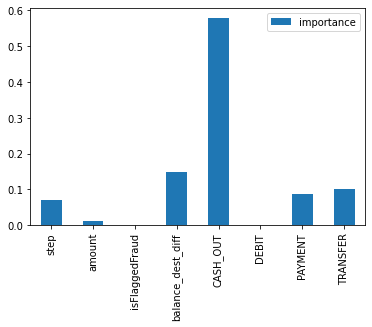

In [62]:
best_features.plot(kind='bar')

In [ ]:
# import pickle
# file = open('xgb_model.pkl', 'wb')
# pickle.dump(xgb, file)

1. The dataset doesn't consist any missing value. For ouliers removal I have used the IQR (Interquartile Range) method considering 25 percentile and 75 percentile and considered the data between the upper and the lower limit. For muticollinearity problem I have used VIF (Variance Inflation Factor) method and eliminated some of the columns with very high VIF.

2. The fraud detection model (XGBoost) tries to analyze the pattern of fraudulent transactions by making use of different modelling techniques and using the results obtained from our study we intend to predict and prevent similar fraud cases in future.The model detects fraud based on factors like transaction amount, type of transaction, step, difference of balance before and after the transaction, whether the final balance is zero or not etc.

3. For selecting variables including in the model I have plotted the heatmap of correlation. The 'oldbalanceOrg' and 'newbalanceOrig' columns are perfectly correlated and the difference of these is equal to the amount column already present in the dataset. So I have dropped the two. Again 'oldbalanceDest' and 'newbalanceDest' columns are very highly correlated. So I have extracted a feature named balance_dest_diff by subtracting these two columns and then dropped the two. I have converted the type column into categorical variables. Four columns - step, amount, CASH_OUT and TRANSFER are the most important features to be included in the model as they have relatively good correlation with the target column.

4. The dataset is imbalanced, so here precision matters more than the accuracy. XGBoost model has the highest precision(0.95) and also has the accuracy score of 1.

5. From the heatmap of correlation, it is seen that step, amount, CASH_OUT, TRANSFER and isFlaggedFraud are the 5 key factors that predict fraudulent customers. The XGBoost model has considered CASH_OUT, balance_diff, step, amount and TRANSFER - these 5 columns as the most important columns.

6. These factors actually make sense. We have seen that if amount of transaction is more than $ 200000, it is more likely to be fraudulent. In actual also this much amount of transaction is hardly made at once, except in some cases. Fraudulent transaction is obviously of Cash-out type, which is one of the most important key factors. Transfer type transaction may be a fraudulent as here amount got deducted from the acount, which is one of the factors. Payment type transaction also may be a fraudulent as here also amount got deducted from the acount. One more feature should be an important factor for detecting fraud transaction is the DEBIT column, but the heatmap of correlation and the our model doesnot considered it as an important factor. The step column may or may not be a factor, as it indicates a unit of time when the transactions got carried out, and fraud transaction can got carried out at any point of time.

7. The financial company should hire fraud blocking company, which creates an automatic transaction fraud analysis, based on transaction type, amount of transaction, final balance after the transaction based on a large transactions dataset.